In [ ]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2024-08-24 13:23:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-08-24 13:23:43 (17.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## ⭐ Download input data


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-08-24 13:42:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  63.5MB/s    in 9.0s    

2024-08-24 13:43:01 (54.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## ⭐ Data Visualization


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

## ⭐Data Preprocessing and augumentation

In [ ]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle = True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle = True
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
dataAug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

## ⭐ Model Building

In [ ]:
input_shape = (224, 224, 3)
base = tf.keras.applications.EfficientNetV2B0(include_top=False ,input_shape=input_shape)
base.trainable = False

input = tf.keras.layers.Input(shape=input_shape)
x = dataAug(input)
x = base(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

output = tf.keras.layers.Dense(10, activation="softmax")(x)

In [ ]:
model1 = tf.keras.Model(input, output)
model1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

es = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, monitor="val_accuracy", patience=3)

hisotry1 = model1.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = int(0.99*len(train_data)),
    validation_data = test_data,
    validation_steps = int(0.99*len(test_data)),
    callbacks = [es]
)

Epoch 1/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 74s 268ms/step - accuracy: 0.7786 - loss: 0.7238 - val_accuracy: 0.8862 - val_loss: 0.3816
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7502 - loss: 0.6913 - val_accuracy: 1.0000 - val_loss: 0.1256
Epoch 3/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 70s 245ms/step - accuracy: 0.8034 - loss: 0.6370 - val_accuracy: 0.8914 - val_loss: 0.3461
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8423 - loss: 0.4979 - val_accuracy: 1.0000 - val_loss: 0.2898
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 75s 219ms/step - accuracy: 0.8224 - loss: 0.5758 - val_accuracy: 0.8974 - val_loss: 0.3319


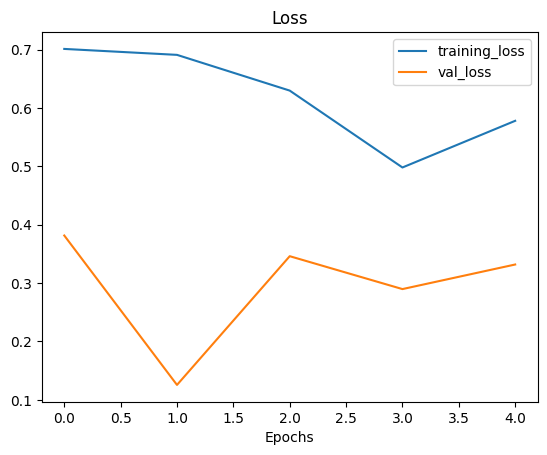

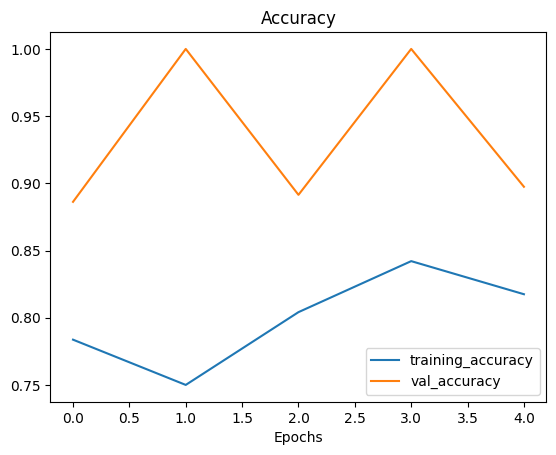

In [ ]:
plot_loss_curves(hisotry1)

In [ ]:
resultFull = model1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8885 - loss: 0.3665


## ⭐ Fine tuning
- we unfreeze some of the layers in the CNN Architecture so that new layers can learn new insights from the data
- ft is used after the model has gained some weights

In [ ]:
for layer_number, layer in enumerate(model1.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
n = print(len(model1.layers[1].trainable_variables))

0


In [ ]:
'all the layers are currently not trainable so, we unfreeze the last 10 layers to train em'

modelBase = model1.layers[2]
modelBase.Trainable =True

for layer in modelBase.layers[:-10]:
    layer.trainable = False

model1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), #use 0.0001 for fine tuning
    metrics = ['accuracy']
)

In [ ]:
for layer_number, layer in enumerate(model1.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
n = print(len(model1.trainable_variables))

12


In [ ]:
history2 = model1.fit(
    train_data,
    epochs = (10),
    validation_steps = int(0.9*len(test_data)),
    validation_data = test_data,
    initial_epoch = 5
)

Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 50s 213ms/step - accuracy: 0.8167 - loss: 0.5930 - val_accuracy: 0.8935 - val_loss: 0.3454
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 77s 189ms/step - accuracy: 0.8127 - loss: 0.5922 - val_accuracy: 0.8991 - val_loss: 0.3212
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 185ms/step - accuracy: 0.8282 - loss: 0.5401 - val_accuracy: 0.8974 - val_loss: 0.3195
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 78s 169ms/step - accuracy: 0.8292 - loss: 0.5358 - val_accuracy: 0.9386 - val_loss: 0.2526
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 189ms/step - accuracy: 0.8347 - loss: 0.5284 - val_accuracy: 0.9010 - val_loss: 0.2975


⭕ Now we get some imporved accuracy and loss values

## ⭐ Result Visualization

In [ ]:
def compare_historys(original_history, new_history, initial_epochs):
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
10
[0.7836745977401733, 0.75, 0.8041487336158752, 0.8421052694320679, 0.8174838423728943, 0.810533344745636, 0.8159999847412109, 0.823199987411499, 0.8289333581924438, 0.8333333134651184]


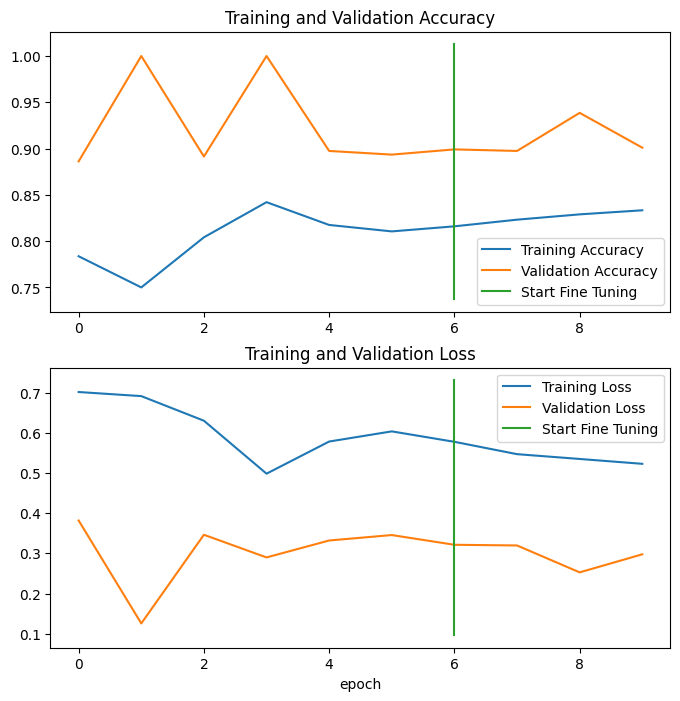

In [ ]:
compare_historys(hisotry1, history2, 7)

In [ ]:
resultFull = model1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9032 - loss: 0.2928
